# Introductory MAZE Tutorial
This jupyter notebook goes through the maze code and goes into details on how to use it

***
#### Installation  

Clone the MAZE repo and install it with pip install .

#### Verify Installation
Verify the Installation by importing maze and making a simple empty Zeolite

In [69]:
import maze

In [70]:
maze.Zeolite()

Zeolite(symbols='', pbc=False)

****

#### Making a Simple Zeolite Using the Make Function

A cif file contains the crystallographic information that defines a zeolite structure. A downloaded cif from the iza-sc database of zeolite strucutres looks like this:


An important piece of information in each cif file is the _atom_site_label (01, 02, ... t1, t2.. ect.) that is located in the first column near the atom position information. This information about the atoms identities is lost when the ``ase.io.read`` function is used to build an atoms object from a cif file. Because the identity of the T-sites is critical for zeolite simulation experiments, this issue inspired the creation of a custom constructor of the ``Zeolite`` object: ``make``. This static method creates a ``Zeolite`` object, labels the unique atoms by tagging them, and then stores the mapping between the ``atom_site_label`` and the atom indices in the dictionaries ``site_to_atom_indices`` and ``atom_indices_to_site``.


To demonstrate this feature, let us try building a ``Zeolite`` object from a cif file.

First, we import the MAZE package, the cif_download function and the Zeolite object

In [71]:
import maze
from maze.cif_download import download_cif

In [72]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

Next we import some ase packages to help us view the Zeolites we make.

In [73]:
download_cif('CHA', data_dir='data')

Now we can use the static ``make`` method to ``Zeolite`` with labeled atoms.


In [74]:
cha_zeolite = Zeolite.make('CHA', data_dir='data')

Our ``Zeolite`` object has been built. We can view it with the ase plot_atoms method (or view method). This works flawlessly because the ``Zeolite`` class  is a subclass of the ``Atoms`` class.

<AxesSubplot:>

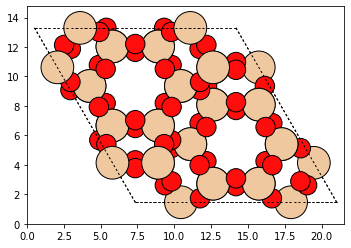

In [75]:
plot_atoms(cha_zeolite)

The atom identity information is stored in two dictionaries. Let's take a look at them:

In [76]:
print(cha_zeolite.site_to_atom_indices)

{'O1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'O2': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'O3': [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53], 'O4': [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], 'T1': [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]}


In [77]:
print(cha_zeolite.atom_indices_to_sites)

{0: 'O1', 1: 'O1', 2: 'O1', 3: 'O1', 4: 'O1', 5: 'O1', 6: 'O1', 7: 'O1', 8: 'O1', 9: 'O1', 10: 'O1', 11: 'O1', 12: 'O1', 13: 'O1', 14: 'O1', 15: 'O1', 16: 'O1', 17: 'O1', 18: 'O2', 19: 'O2', 20: 'O2', 21: 'O2', 22: 'O2', 23: 'O2', 24: 'O2', 25: 'O2', 26: 'O2', 27: 'O2', 28: 'O2', 29: 'O2', 30: 'O2', 31: 'O2', 32: 'O2', 33: 'O2', 34: 'O2', 35: 'O2', 36: 'O3', 37: 'O3', 38: 'O3', 39: 'O3', 40: 'O3', 41: 'O3', 42: 'O3', 43: 'O3', 44: 'O3', 45: 'O3', 46: 'O3', 47: 'O3', 48: 'O3', 49: 'O3', 50: 'O3', 51: 'O3', 52: 'O3', 53: 'O3', 54: 'O4', 55: 'O4', 56: 'O4', 57: 'O4', 58: 'O4', 59: 'O4', 60: 'O4', 61: 'O4', 62: 'O4', 63: 'O4', 64: 'O4', 65: 'O4', 66: 'O4', 67: 'O4', 68: 'O4', 69: 'O4', 70: 'O4', 71: 'O4', 72: 'T1', 73: 'T1', 74: 'T1', 75: 'T1', 76: 'T1', 77: 'T1', 78: 'T1', 79: 'T1', 80: 'T1', 81: 'T1', 82: 'T1', 83: 'T1', 84: 'T1', 85: 'T1', 86: 'T1', 87: 'T1', 88: 'T1', 89: 'T1', 90: 'T1', 91: 'T1', 92: 'T1', 93: 'T1', 94: 'T1', 95: 'T1', 96: 'T1', 97: 'T1', 98: 'T1', 99: 'T1', 100: 'T1'

Depending on the situation, one dictionary may be more useful than the other.


#### One Step Zeolite Construction

Downloading a cif file everytime you want to load a new Zeolite can be annoying. Thus, the ``make`` function automatically downloads the cif file from the IZA database if it cannot be located in the provided directory. It places the downloaded cif file in folder called ``data`` in the current working directory. Data paths can be specified with the ``data_dir`` optional argument. 

<AxesSubplot:>

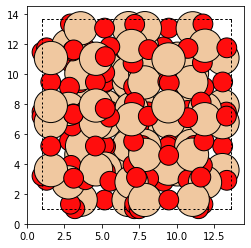

In [78]:
bea_zeolite = Zeolite.make('BEA')  # Download the BEA cif file and build zeolite
plot_atoms(bea_zeolite)

****

### Identifying Atom Types in a Zeolite Structure


The ``Zeotype`` class includes methods for identifying the different types of atoms in a zeolite structure. These methods will work on all ``Zeotype`` objects, even those where the ``atom_indices_to_site`` and ``site_to_atom_indices`` are not set.


Let's import the Zeolite object and make a BEA structure and some tools to visualize the structures we create. 

In [79]:
from maze import zeolite 

In [80]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

<AxesSubplot:>

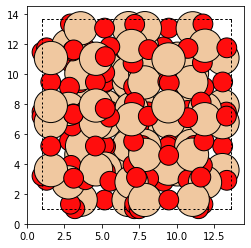

In [81]:
bea_zeolite = Zeolite.make('BEA')
plot_atoms(bea_zeolite)

To make things more interesting, let us replace the Si-T1 sites in the bea Zeolite with Aluminum.

In [82]:
for t1_index in bea_zeolite.site_to_atom_indices['T1']:
    bea_zeolite[t1_index].symbol = 'Al'

<AxesSubplot:>

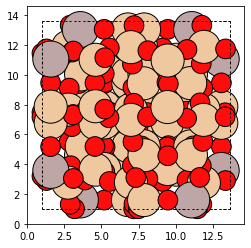

In [83]:
plot_atoms(bea_zeolite)

Making a replacement is that simple! Now we will use the ``count_elements`` method to get the count of each atom in the zeolite and the idenity of each atom. 

In [84]:
atoms_indices, count = bea_zeolite.count_elements()

In [85]:
print(atoms_indices)

{'O': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], 'Al': [128, 129, 130, 131, 132, 133, 134, 135], 'Si': [136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]}


In [86]:
print(count)

{'O': 128, 'Al': 8, 'Si': 56}


****

### Extracting, Adding and Capping Clusters

One of the most useful features of the MAZE package is the ability to add and remove atoms from a ``Zeolite`` object. To demonstrate this, we will extract a cluster from an ``Zeolite`` object, change some of the atoms, and then integrate it back into the main ``Zeolite``.


First, we import the zeolite object and the plot_atoms function.

In [88]:
from maze import zeolite 
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

Then we make a bea_zeolite object

<AxesSubplot:>

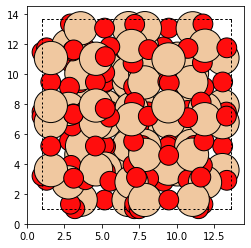

In [97]:
bea_zeolite = Zeolite.make('BEA')
plot_atoms(bea_zeolite)

The next step is to pick a T-site and then use one of the static methods in the ``Cluster`` class to select indices to build the cluster.

The atom 154 is right in the middle of the zeolite, which will make viewing the cluster creation easy. One could also use the ``site_to_atom_indices`` dictionary to select a specific T site.

The Zeolite object uses a ``ClusterMaker`` object to select out certain groups of atoms from the Zeolite. 

By default a ``DefaultClusterMaker`` object is used. This ``DefaultClusterMaker`` object has a ``get_cluster_indices`` method which uses ``get_oh_cluster_indices`` function to selects the indices of central t atom, and surrounding oxygens and hydrogens. There are other cluster functions avalible in the source code of ``DefaultClusterMaker``. If you need some different functionality, simply make your own ClusterMaker object and set the ``Zeolite.cluster_maker`` attribute to your custom cluster maker.

Let us call our ``bea_zeolite``'s ``ClusterMaker`` object's ``get_cluster_indices`` fun, to see what indices it will select. 

In [98]:
site = 154 
cluster_indices = bea_zeolite.cluster_maker.get_cluster_indices(bea_zeolite, site)
print(cluster_indices)

[2, 66, 74, 138, 77, 82, 146, 22, 154, 30, 38, 102, 186, 42, 174, 50, 114, 117, 118, 58, 126]


These are the indices of the atoms that will make up the resulting cluster and the indices of the atoms that will be absent in the open defect zeolite. 

We can now make the cluster and open defefect zeolites by using the ``get_cluster`` method.

In [99]:
cluster, od = bea_zeolite.get_cluster(154)

The cluster looks like this 

<AxesSubplot:>

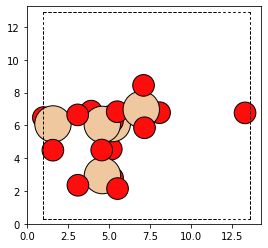

In [101]:
plot_atoms(cluster)

the open defect looks like this 

<AxesSubplot:>

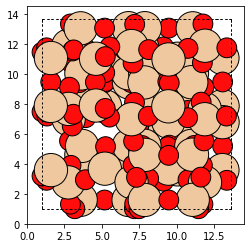

In [102]:
plot_atoms(od)

Both the open defect and the cluster are ``Zeolite`` objects, yet they have a different ztype attribute

In [112]:
display(type(bea_zeolite))
display(type(od))
display(type(cluster))

maze.zeolite.Zeolite

maze.zeolite.Zeolite

maze.zeolite.Zeolite

In [104]:
display(bea_zeolite.ztype)
display(od.ztype)
display(cluster.ztype)

'Zeolite'

'Open Defect'

'Cluster'

Next we want to cap the cluster and changes some of the atoms its structure. Capping involves adding hydrogens and oxygens to the cluster. The built-in ``cap_atoms()`` method returns a new cluster object that has hydrogen caps added to it.


In [106]:
capped_cluster = cluster.cap_atoms()

<AxesSubplot:>

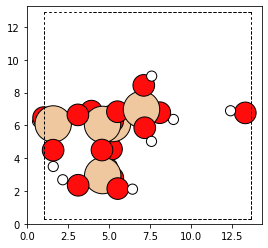

In [108]:
plot_atoms(capped_cluster)

In a typical zeolite workflow, this cluster would be optimized. Configuring an optimizer can be tricky, and so for this tutorial we instead replace the oxygen atoms with aluminum atoms. 

In [113]:
for atom in capped_cluster:
    if atom.symbol == 'O':
        capped_cluster[atom.index].symbol = 'Al'

<AxesSubplot:>

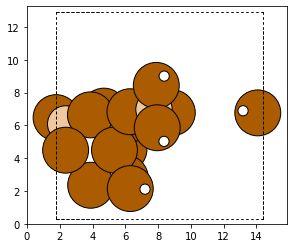

In [114]:
plot_atoms(capped_cluster)

The next stage is removing the caps from the atom and reintegrating it back into the original zeolite.

To remove caps, we have to find the name of the caps in ``additions`` dictionary

In [116]:
dict(capped_cluster.additions)

{'h_caps': ['h_caps_34']}

or we can just select the last h_caps added using pythons list methods

In [128]:
additon_category = 'h_caps'
addition_name = capped_cluster.additions[additon_category][-1]
display(addition_name)

'h_caps_34'

Next we call the remove_addition method

In [129]:
uncapped_cluster = capped_cluster.remove_addition(addition_name, additon_category)

<AxesSubplot:>

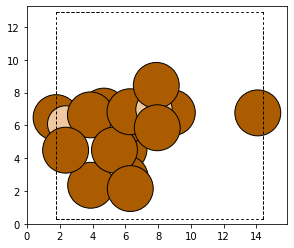

In [130]:
plot_atoms(uncapped_cluster)

The caps have been removed. We can now integrate the cluster back into the original zeolite.

In [131]:
bea_zeolite_with_al = bea_zeolite.integrate(uncapped_cluster)

<AxesSubplot:>

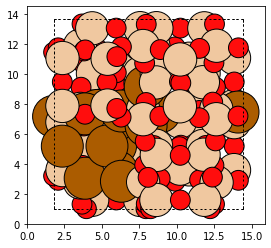

In [133]:
plot_atoms(bea_zeolite_with_al)

The changes have been made. An important thing to notice is that none of the structural manipulation features of MAZE have side-effects. The ``bea_zeolite`` remains unchanged by this integration and a new ``bea_zeolite_with_al`` is created. Along with leading to cleaner code with fewew bugs, this style of programming also allows for method chanining. 

This demo showed the power of the MAZE code to extract and add clusters to zeotypes. This is one of the most useful features in the MAZE code.